In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm as tqdm
import cv2
import tensorflow as tf
import os

In [2]:
pip install git+https://github.com/tensorflow/examples.git

^C
Note: you may need to restart the kernel to use updated packages.


  Running command git clone -q https://github.com/tensorflow/examples.git 'C:\Users\Ahmad\AppData\Local\Temp\pip-req-build-_mmj1od8'
  error: RPC failed; curl 92 HTTP/2 stream 5 was not closed cleanly: CANCEL (err 8)
  error: 6286 bytes of body are still expected
  fetch-pack: unexpected disconnect while reading sideband packet
  fatal: early EOF
  fatal: fetch-pack: invalid index-pack output
ERROR: Command errored out with exit status 128: git clone -q https://github.com/tensorflow/examples.git 'C:\Users\Ahmad\AppData\Local\Temp\pip-req-build-_mmj1od8' Check the logs for full command output.


  Cloning https://github.com/tensorflow/examples.git to c:\users\ahmad\appdata\local\temp\pip-req-build-_mmj1od8


Loading The Data

In [12]:
# Fuction to count File
def Count_Files(path):
    """
    Function to count the number of files in a given Directory
    Input   : Folder Path <string>
    Returns : File Count <Integer> 
    """
    # File Traverse through given directory to get file count
    parentFolder,file_count=path,0
    for root, dirs, fileList in os.walk(parentFolder):
        file_count+=len(fileList)
    return file_count

# Dataset Source
root1="E:/Projects/Semantic Segmentation/idd20kII/leftImg8bit/"
root2="E:/Projects/Semantic Segmentation/idd20kII/gtFine/"

# print File counts
print("IDD_Segmentation Part-1:")
print("Part1 Train Samples:",Count_Files(root1+"train"))
print("Part1 Val Samples:  ",Count_Files(root1+"val"))
print("Part1 Test Samples: ",Count_Files(root1+"test"))
print("--"*13+"\n"+"--"*13)
print("Idd20kII  Part-2:")
print("Part2 Train Samples:",Count_Files(root2+"train"))
print("Part2 Val Samples:  ",Count_Files(root2+"val"))
print("Part2 Test Samples: ",Count_Files(root2+"test"))
print("--"*13+"\n"+"--"*13)
print("Total Samples:")
print("Total Train Samples:",Count_Files(root1+"train")+Count_Files(root2+"train"))
print("Total Val Samples:  ",Count_Files(root1+"val")+Count_Files(root2+"val"))
print("Total Test Samples: ",Count_Files(root1+"test")+Count_Files(root2+"test"))
print("--"*13)

IDD_Segmentation Part-1:
Part1 Train Samples: 7034
Part1 Val Samples:   1055
Part1 Test Samples:  2009
--------------------------
--------------------------
Idd20kII  Part-2:
Part2 Train Samples: 7034
Part2 Val Samples:   1055
Part2 Test Samples:  0
--------------------------
--------------------------
Total Samples:
Total Train Samples: 14068
Total Val Samples:   2110
Total Test Samples:  2009
--------------------------


In [55]:
# Function to get Images
def Get_images(path, Grey=False):
    
    """
    This Function returns Images from a given Directory
    Input  : Path <String>, Grey <Boolean>
    Return : Images <list of arrays>
    """
    
    img_files,images=sorted(os.listdir(path)),[] # list names of entries from a given path
    for i in range(len(img_files)):
        if Grey:
            image = cv2.imread(path+img_files[i],cv2.IMREAD_GRAYSCALE) # read image in greyscale by using image reader from opencv
        else:
            image=cv2.cvtColor(cv2.imread(path+img_files[i]),cv2.COLOR_BGR2RGB) # read image and convert it to RGB format 
        images.append(image)
    return images[0] if len(images)==1 else images

Reading image: E:/Projects/Semantic Segmentation/idd20kII/leftImg8bit/val/205\frame0340_leftImg8bit.jpg
Reading image: E:/Projects/Semantic Segmentation/idd20kII/leftImg8bit/val/205\frame0671_leftImg8bit.jpg
Reading image: E:/Projects/Semantic Segmentation/idd20kII/leftImg8bit/val/205\frame0821_leftImg8bit.jpg
Reading image: E:/Projects/Semantic Segmentation/idd20kII/leftImg8bit/val/205\frame1047_leftImg8bit.jpg
Reading image: E:/Projects/Semantic Segmentation/idd20kII/leftImg8bit/val/205\frame1347_leftImg8bit.jpg
Reading image: E:/Projects/Semantic Segmentation/idd20kII/leftImg8bit/val/205\frame1527_leftImg8bit.jpg
Reading image: E:/Projects/Semantic Segmentation/idd20kII/leftImg8bit/val/205\frame1647_leftImg8bit.jpg
Reading image: E:/Projects/Semantic Segmentation/idd20kII/leftImg8bit/val/205\frame1793_leftImg8bit.jpg
Reading image: E:/Projects/Semantic Segmentation/idd20kII/leftImg8bit/val/205\frame1898_leftImg8bit.jpg
Reading image: E:/Projects/Semantic Segmentation/idd20kII/leftIm

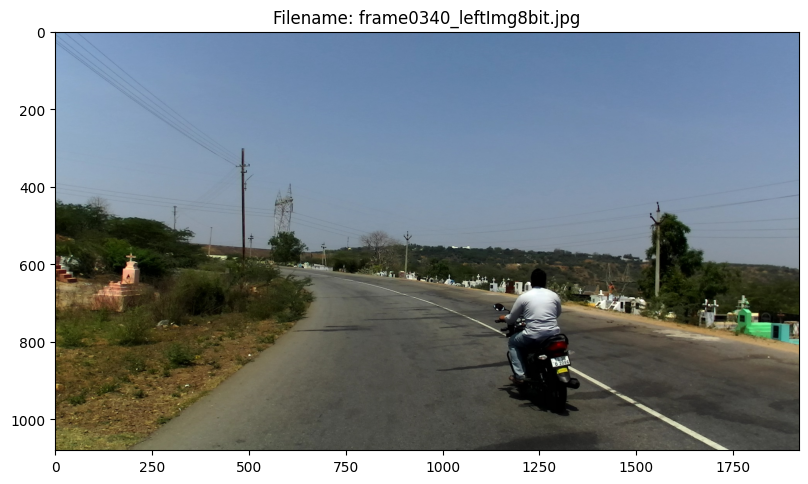

	   RGB Image Shape:  (1080, 1920, 3)
	   Red Channel:  Min Value: 0  Max Value: 255 
	 Green Channel:  Min Value: 0  Max Value: 255 
	  Blue Channel:  Min Value: 0  Max Value: 255 


In [56]:
import os
import cv2
import matplotlib.pyplot as plt

def Get_images(path, Grey=False):
    img_files, images = sorted(os.listdir(path)), []
    for i in range(len(img_files)):
        current_path = os.path.join(path, img_files[i])
        print(f"Reading image: {current_path}")
        if Grey:
            image = cv2.imread(current_path, cv2.IMREAD_GRAYSCALE)
        else:
            image = cv2.cvtColor(cv2.imread(current_path), cv2.COLOR_BGR2RGB)
        images.append((img_files[i], image))
    return images

# Try to read images and print debug information
image_list = Get_images('E:/Projects/Semantic Segmentation/idd20kII/leftImg8bit/val/205')

# Plot the first image
filename, RGB_Image = image_list[0]
plt.figure(figsize=(9.6, 6.8))
plt.imshow(RGB_Image)
plt.title(f"Filename: {filename}")
plt.show()

# Move axis (channels) and print image info
Channel_Image = np.moveaxis(RGB_Image, -1, 0)
print("\t   RGB Image Shape: ", RGB_Image.shape)
print("\t   Red Channel:  Min Value: {0}  Max Value: {1} ".format(min(Channel_Image[0].ravel()), max(Channel_Image[0].ravel())))
print("\t Green Channel:  Min Value: {0}  Max Value: {1} ".format(min(Channel_Image[1].ravel()), max(Channel_Image[1].ravel())))
print("\t  Blue Channel:  Min Value: {0}  Max Value: {1} ".format(min(Channel_Image[2].ravel()), max(Channel_Image[2].ravel())))


In [13]:
import os

def collect_paths(base_path, subset_folders):
    paths = []

    for subset_folder in subset_folders:
        subset_path = os.path.join(base_path, subset_folder)
        
        for root, dirs, files in os.walk(subset_path):
            for file in files:
                current_path = os.path.join(root, file)
                paths.append(current_path)

    return paths

base_image_path = "E:/Projects/Semantic Segmentation/idd20kII/leftImg8bit"
base_mask_path = "E:/Projects/Semantic Segmentation/idd20kII/gtFine"

# List of subset folders (train, val, test)
subset_folders = ["train", "val", "test"]

# Collect image and mask paths for each subset
train_image_paths = collect_paths(base_image_path, ["train"])
val_image_paths = collect_paths(base_image_path, ["val"])
test_image_paths = collect_paths(base_image_path, ["test"])

train_mask_paths = collect_paths(base_mask_path, ["train"])
val_mask_paths = collect_paths(base_mask_path, ["val"])
test_mask_paths = collect_paths(base_mask_path, ["test"])

# Display lengths of each subset
print("Train Image Paths:", len(train_image_paths))
print("Val Image Paths:", len(val_image_paths))
print("Test Image Paths:", len(test_image_paths))

print("Train Mask Paths:", len(train_mask_paths))
print("Val Mask Paths:", len(val_mask_paths))
print("Test Mask Paths:", len(test_mask_paths))


Train Image Paths: 7034
Val Image Paths: 1055
Test Image Paths: 2009
Train Mask Paths: 7034
Val Mask Paths: 1055
Test Mask Paths: 0


In [14]:
def random_flip(image, mask):
    image = tf.image.flip_left_right(image)
    mask = tf.image.flip_left_right(mask)
    return image, mask


def load_image_and_mask(image_path, mask_path):
    # Use tf.io.read_file to read image and mask files
    image = tf.io.read_file(image_path)
    mask = tf.io.read_file(mask_path)

    # Decode images
    image = tf.image.decode_png(image, channels=3)
    mask = tf.image.decode_png(mask, channels=1)

    # Resize images and masks
    image = tf.image.resize(image, (256, 256))
    mask = tf.image.resize(mask, (256, 256))

    # Cast to float32 and normalize
    image = tf.cast(image, tf.float32) / 255.0
    mask = tf.cast(mask, tf.float32)

    return image, mask






Creating a binary mask using the JSON Files!

In [33]:
import subprocess
import os

# Import the binary_mask.py script
binary_mask_script = "Binary Masks.py"

output_masks_path = "E:/Projects/Semantic Segmentation/idd20kII/testMasks"

# Function to get a consistent folder structure for masks
def get_mask_output_folder(original_image_path, output_masks_path):
    relative_path = os.path.relpath(original_image_path, base_image_path)
    mask_output_folder = os.path.join(output_masks_path, relative_path)
    return os.path.splitext(mask_output_folder)[0]  # Remove file extension

# Iterate over each subset and call the script
for subset, image_paths, mask_paths in zip(["train", "val"],
                                          [train_image_paths, val_image_paths],
                                          [train_mask_paths, val_mask_paths]):
    for image_path, mask_path in zip(image_paths, mask_paths):
        output_folder = get_mask_output_folder(image_path, output_masks_path)
        os.makedirs(output_folder, exist_ok=True)

        subprocess.run(["python", binary_mask_script, mask_path, image_path, output_folder])


In [15]:
import os

def collect_mask_paths(base_path, subset_folder):
    mask_paths = []

    subset_path = os.path.join(base_path, subset_folder)

    for root, dirs, files in os.walk(subset_path):
        for file in files:
            if file.endswith(".png") or file.endswith(".jpg"):
                current_path = os.path.join(root, file)
                mask_paths.append(current_path)

    return mask_paths

# Specify your base path
base_masks_path = "E:/Projects/Semantic Segmentation/idd20kII/testMasks"

# Specify subset folders
train_subset = "train"
val_subset = "val"

# Collect mask paths for train and val subsets
train_mask_paths = collect_mask_paths(base_masks_path, train_subset)
val_mask_paths = collect_mask_paths(base_masks_path, val_subset)

# Display lengths of each subset
print("Train Mask Paths:", len(train_mask_paths))
print("Val Mask Paths:", len(val_mask_paths))


Train Mask Paths: 7017
Val Mask Paths: 1053


In [16]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os

# Define your custom dataset class
class CustomDataset(Dataset):
    def __init__(self, image_paths, mask_paths, transform=None):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        mask_path = self.mask_paths[idx]
        image = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")  # Convert to grayscale mask

        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask

# Define the transformation you want to apply to the images and masks
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize images to a fixed size
    transforms.ToTensor(),  # Convert images to PyTorch tensors
])

# Filter out pairs without corresponding masks
valid_train_image_paths = [img for img, mask in zip(train_image_paths, train_mask_paths) if os.path.exists(mask)]
valid_train_mask_paths = [mask for img, mask in zip(train_image_paths, train_mask_paths) if os.path.exists(mask)]

valid_val_image_paths = [img for img, mask in zip(val_image_paths, val_mask_paths) if os.path.exists(mask)]
valid_val_mask_paths = [mask for img, mask in zip(val_image_paths, val_mask_paths) if os.path.exists(mask)]

# Create datasets for training and validation
train_dataset = CustomDataset(valid_train_image_paths, valid_train_mask_paths, transform=transform)
val_dataset = CustomDataset(valid_val_image_paths, valid_val_mask_paths, transform=transform)

# Create data loaders
batch_size = 1
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


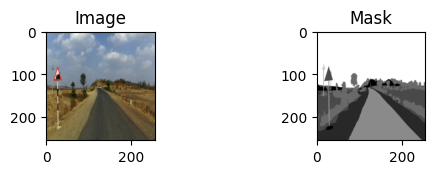

In [19]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF

# Take a few samples from the training DataLoader
sample_size = 3
sample_train_loader = DataLoader(train_dataset, batch_size=sample_size, shuffle=True)


# Display the image
plt.subplot(sample_size, 2, 1)
plt.imshow(image_np)
plt.title('Image')

# Display the mask
plt.subplot(sample_size, 2, 2)
plt.imshow(mask_np, cmap='gray')
plt.title('Mask')

plt.show()


Making a model

In [28]:
import torch
import torch.nn as nn

class DoubleConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DoubleConvBlock, self).__init__()
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv(x)

class DownsampleBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DownsampleBlock, self).__init__()
        self.double_conv = DoubleConvBlock(in_channels, out_channels)
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout = nn.Dropout2d(p=0.3)

    def forward(self, x):
        conv_features = self.double_conv(x)
        pooled = self.maxpool(conv_features)
        return conv_features, self.dropout(pooled)

class UpsampleBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UpsampleBlock, self).__init__()
        self.conv_transpose = nn.ConvTranspose2d(in_channels, out_channels, kernel_size=3, stride=2, padding=1)
        self.double_conv = DoubleConvBlock(in_channels + out_channels, out_channels)
        self.dropout = nn.Dropout2d(p=0.3)

    def forward(self, x, conv_features):
        x = self.conv_transpose(x)
        
        print("Shape of x before concatenation:", x.shape)
        print("Shape of conv_features:", conv_features.shape)
        
        x = torch.cat([x, conv_features], dim=1)  # Concatenate x and conv_features
                
        print("Shape of x after concatenation:", x.shape)
        
        x = self.dropout(x)
        return self.double_conv(x)


class UNet(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UNet, self).__init__()
        self.encoder1 = DownsampleBlock(in_channels, 64)
        self.encoder2 = DownsampleBlock(64, 128)
        self.encoder3 = DownsampleBlock(128, 256)
        self.encoder4 = DownsampleBlock(256, 512)

        self.bottleneck = DoubleConvBlock(512, 1024)

        self.decoder1 = UpsampleBlock(1024, 512)
        self.decoder2 = UpsampleBlock(512, 256)
        self.decoder3 = UpsampleBlock(256, 128)
        self.decoder4 = UpsampleBlock(128, 64)

        self.output_layer = nn.Conv2d(64, out_channels, kernel_size=1)

    def forward(self, x):
        f1, p1 = self.encoder1(x)
        f2, p2 = self.encoder2(p1)
        f3, p3 = self.encoder3(p2)
        f4, p4 = self.encoder4(p3)

        bottleneck = self.bottleneck(p4)

        u6 = self.decoder1(bottleneck, f4)
        u7 = self.decoder2(u6, f3)
        u8 = self.decoder3(u7, f2)
        u9 = self.decoder4(u8, f1)

        return self.output_layer(u9)

# Create the U-Net model with input channels=3 and output channels=1 (binary classification)
unet_model = UNet(in_channels=3, out_channels=1)
print(unet_model)


UNet(
  (encoder1): DownsampleBlock(
    (double_conv): DoubleConvBlock(
      (double_conv): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU(inplace=True)
        (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (3): ReLU(inplace=True)
      )
    )
    (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (dropout): Dropout2d(p=0.3, inplace=False)
  )
  (encoder2): DownsampleBlock(
    (double_conv): DoubleConvBlock(
      (double_conv): Sequential(
        (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU(inplace=True)
        (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (3): ReLU(inplace=True)
      )
    )
    (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (dropout): Dropout2d(p=0.3, inplace=False)
  )
  (encoder3): DownsampleBlock(
    (do

In [29]:
# Assuming 'unet_model' is your UNet model
input_tensor = torch.randn(1, 3, 256, 256)  # Example input tensor
output = unet_model(input_tensor)


Shape of x before concatenation: torch.Size([1, 512, 31, 31])
Shape of conv_features: torch.Size([1, 512, 32, 32])


RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 31 but got size 32 for tensor number 1 in the list.

In [22]:
# Print the structure of the training dataset
print("Training Dataset Structure:")
for i, (input_image, mask) in enumerate(train_loader):
    print("Sample", i+1)
    print("Input Shape:", input_image.shape)
    print("Mask Shape:", mask.shape)
    break  # Only print the structure of the first sample

# Print the structure of the validation dataset
print("\nValidation Dataset Structure:")
for i, (input_image, mask) in enumerate(val_loader):
    print("Sample", i+1)
    print("Input Shape:", input_image.shape)
    print("Mask Shape:", mask.shape)
    break  # Only print the structure of the first sample


Training Dataset Structure:
Sample 1
Input Shape: torch.Size([1, 3, 256, 256])
Mask Shape: torch.Size([1, 1, 256, 256])

Validation Dataset Structure:
Sample 1
Input Shape: torch.Size([1, 3, 256, 256])
Mask Shape: torch.Size([1, 1, 256, 256])


In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm

# Assuming 'train_dataset' and 'val_dataset' are instances of torch.utils.data.Dataset
unet_model.to('cuda')

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(unet_model.parameters())

# Training loop
num_epochs = 50
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    unet_model.train()  # Set the model to training mode
    running_loss = 0.0

    # Create a tqdm progress bar for the training dataloader
    train_dataloader_iter = tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}', leave=False)

    for inputs, targets in train_dataloader_iter:
        inputs, targets = inputs.to('cuda'), targets.to('cuda')

        optimizer.zero_grad()
        outputs = unet_model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Update the progress bar
        train_dataloader_iter.set_postfix(loss=loss.item())

    average_train_loss = running_loss / len(train_loader)
    train_losses.append(average_train_loss)

    # Validation
    unet_model.eval()  # Set the model to evaluation mode
    val_loss = 0.0

    with torch.no_grad():
        # Create a tqdm progress bar for the validation dataloader
        val_dataloader_iter = tqdm(val_loader, desc=f'Validation', leave=False)

        for inputs, targets in val_dataloader_iter:
            inputs, targets = inputs.to('cuda'), targets.to('cuda')

            outputs = unet_model(inputs)
            loss = criterion(outputs, targets)

            val_loss += loss.item()

            # Update the progress bar
            val_dataloader_iter.set_postfix(loss=loss.item())

    average_val_loss = val_loss / len(val_loader)
    val_losses.append(average_val_loss)

    # Print the losses
    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {average_train_loss}, Val Loss: {average_val_loss}")


RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 31 but got size 32 for tensor number 1 in the list.